#### 데스크탑 자동화
- pip install opencv-python
- pip install pyautogui => 마우스/키보드 조작, 윈도우

In [2]:
import pyautogui as p

# 해상도 확인
size = p.size()
print(size)
print(size[0])

Size(width=1920, height=1080)
1920


In [6]:
# 마우스 조작

# 마우스 좌표 가져오기
position  = p.position()
print(position)
print(position.x, position.y)

Point(x=533, y=508)
533 508


In [8]:
# 마우스 이동: moveTo(x, y, 움직이는 시간) - 절대좌표
p.moveTo(100, 100, 0.5)
p.moveTo(200, 200, 0.5)
p.moveTo(300, 300, 0.5)

In [10]:
# 마우스 이동: move(x, y, 움직이는 시간), moveRel() - 상대좌표
p.moveTo(100, 100, 0.5)
p.move(300, 300, 0.25)
print(p.position())
p.move(100, 100, 0.25)

Point(x=400, y=400)


In [13]:
# 현재 위치에서 클릭
p.click()

# p.click(1970, 14): 해당 좌표에서 클릭

In [28]:
p.sleep(3)
p.position()

Point(x=1516, y=58)

In [18]:
p.click(55, 17, 1)

In [22]:
# 더블클릭
p.click(clicks=2)

In [25]:
p.doubleClick()

In [27]:
# 오른쪽 클릭
p.rightClick()

In [32]:
# drag(): 상대위치로 drag
p.moveTo(x=1516, y=58)
p.drag(150,0, 0.25)

In [37]:

p.moveTo(x=1516, y=58)
p.dragTo(150,0, 0.25)

In [45]:
# 양수인 경우: 위
# 음수인 경우: 아래
# p.scroll(1000)
# p.scroll(-1000)

p.moveTo(x=1516, y=158)
p.sleep(2)
p.scroll(-1000)

In [73]:
p.mouseInfo()

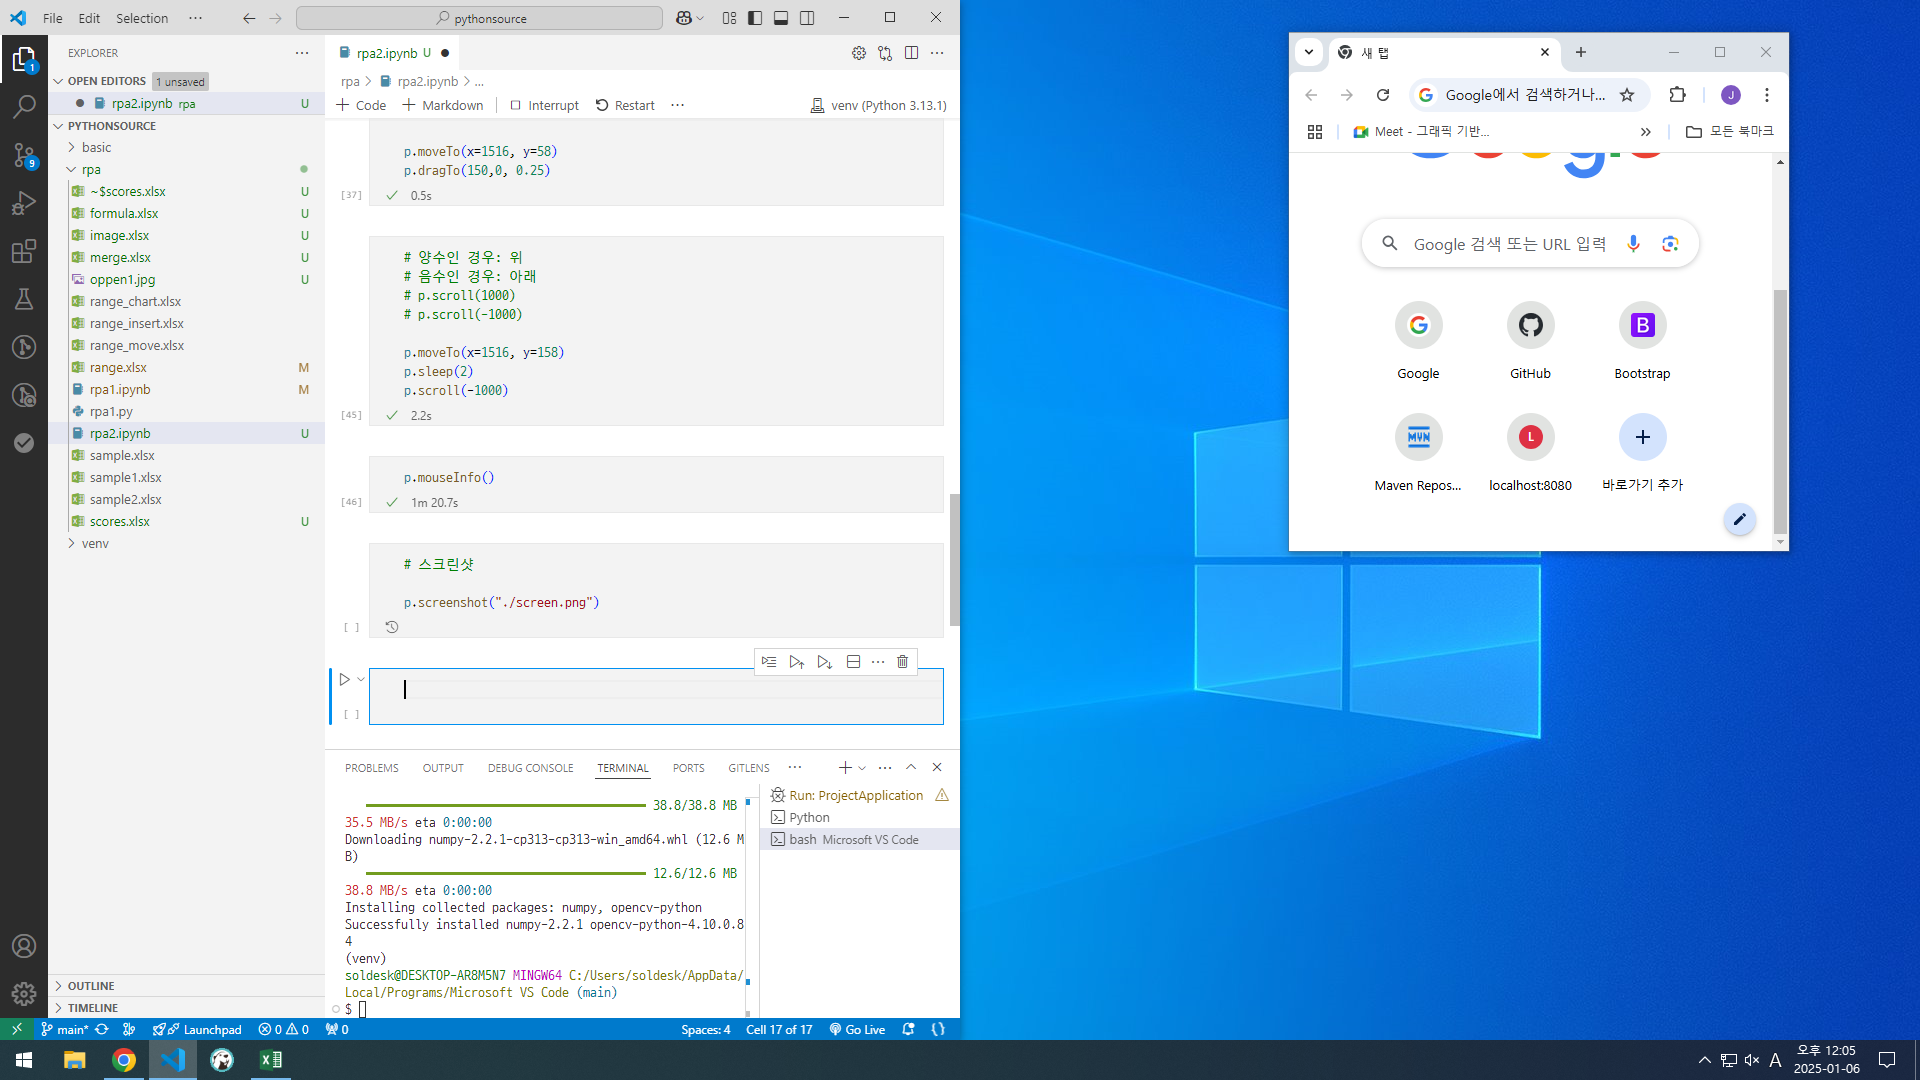

In [47]:
# 스크린샷
# p.screenshot("파일명", region=()): 특정위치에 대한 스크린샷

# 전체화면
p.screenshot("./screen.png")

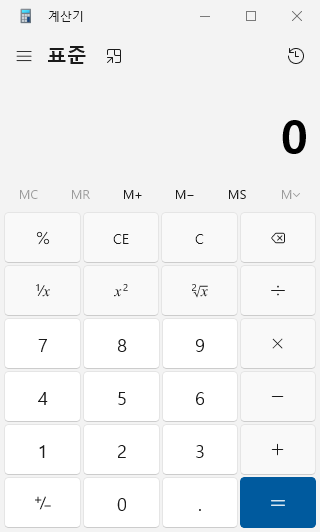

In [63]:
# region(left, top, width, height)
p.screenshot("./screen.png",region=(1288,30,320,532))

In [72]:
print(p.locateOnScreen("./screen.png"))

Box(left=np.int64(1238), top=np.int64(299), width=320, height=532)


In [ ]:
# vscode File 메뉴 캡쳐
p.screenshot("./file.png", region=(35, 8 , 35, 20))

p.sleep(1)

file_locate = p.locateOnScreen("./file.png")
print(file_locate)

Box(left=np.int64(35), top=np.int64(8), width=35, height=20)


In [86]:
file_locate = p.locateOnScreen("./file.png", confidence=0.9)
p.click(file_locate)

In [92]:
# locateAllOnScreen()
p.sleep(1)
p.screenshot("./checkbox.png", region=(1456, 225, 14, 14))

In [95]:
for i in p.locateAllOnScreen("./checkbox.png"):
    print(i)
    p.click(i)

Box(left=np.int64(1456), top=np.int64(225), width=14, height=14)
Box(left=np.int64(1456), top=np.int64(246), width=14, height=14)
Box(left=np.int64(1456), top=np.int64(267), width=14, height=14)


In [99]:
# 윈도우
# 현재 활성화된 창
window = p.getActiveWindow()
print(window)
print(window.title)
print(window.top, window.left, window.width, window.height)

<Win32Window left="-8", top="-8", width="1936", height="1056", title="● rpa2.ipynb - pythonsource - Visual Studio Code">
● rpa2.ipynb - pythonsource - Visual Studio Code
-8 -8 1936 1056


In [101]:
for w in p.getAllWindows():
    print(w)

<Win32Window left="0", top="1040", width="1920", height="40", title="">
<Win32Window left="-8", top="-8", width="1936", height="1056", title="● rpa2.ipynb - pythonsource - Visual Studio Code">
<Win32Window left="1280", top="29", width="336", height="541", title="계산기">
<Win32Window left="1254", top="613", width="613", height="488", title="*제목 없음 - Windows 메모장">
<Win32Window left="0", top="0", width="1920", height="1040", title="">
<Win32Window left="0", top="1", width="320", height="532", title="계산기">
<Win32Window left="936", top="122", width="336", height="541", title="계산기">
<Win32Window left="0", top="0", width="0", height="0", title="">
<Win32Window left="15", top="0", width="1905", height="4", title="">
<Win32Window left="0", top="0", width="0", height="0", title="">
<Win32Window left="0", top="0", width="0", height="0", title="">
<Win32Window left="0", top="0", width="1920", height="1080", title="Microsoft Text Input Application">
<Win32Window left="-32000", top="-32000", width="16

In [103]:
# 특정 창 가져오기
for w in p.getWindowsWithTitle("제목 없음"):
    print(w)

<Win32Window left="1254", top="613", width="613", height="488", title="*제목 없음 - Windows 메모장">


In [104]:
w = p.getWindowsWithTitle("제목 없음")[0]
if not w.isActive:
    w.activate()

In [105]:
if not w.isMaximized:
    w.maximize()

In [107]:
if not w.isMinimized:
    w.minimize()

In [124]:
# 키보드
w = p.getWindowsWithTitle("제목 없음")[0]
w.activate()
p.write("write")

In [125]:
w = p.getWindowsWithTitle("제목 없음")[0]
w.activate()
p.write("pyautogui", interval=0.25)

In [126]:
w = p.getWindowsWithTitle("제목 없음")[0]
w.activate()
p.write("안녕하세요", interval=0.25) # 한글 안됨

In [127]:
import pyperclip

w = p.getWindowsWithTitle("제목 없음")[0]
w.activate()
pyperclip.copy("안녕하세요") # 클립보드
p.hotkey("ctrl", "v") # ctrl + v

In [129]:
def hangul_write(text):
    pyperclip.copy(text) # 클립보드
    p.hotkey("ctrl", "v") # ctrl + v

In [131]:
w = p.getWindowsWithTitle("제목 없음")[0]
w.activate()
hangul_write("반갑습니다")
hangul_write("hello")

In [134]:
w = p.getWindowsWithTitle("제목 없음")[0]
w.activate()

p.hotkey("ctrl", "a")

# ctrl + A 키보드 누르기
# p.keyDown("ctrl")
# p.keyDown("a")
# ctrl + A 키보드 손 떼기
# p.keyUp("a")
# p.keyUp("ctrl")

In [135]:
p.hotkey("ctrl", "shift", "esc")

In [137]:
p.alert("자동화 수행에 실패했습니다.")

'OK'

In [139]:
p.alert("자동화 수행에 실패했습니다.", title="확인")

'OK'

In [141]:
result = p.confirm("계속 진행하시겠습니까?", title="경고")
print(result)

Cancel


In [142]:
p.prompt("아이디를 입력해 주세요.", title="로그인", default="TEST")

'TEST'

In [143]:
p.password("패스워드를 입력해 주세요.", title="비밀번호")

'afdfasfsd'